Performing EDA on Forbes Richest Athlete (1990-2020) Dataset

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [78]:
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df_copy = df.copy()

In [79]:
df.sample(8)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
161,162,Tiger Woods,USA,1,1,golf,2007,100.0
275,276,Neymar,Brazil,5,18,Soccer,2018,90.0
191,192,Tiger Woods,USA,1,1,golf,2010,105.0
146,147,Michael Jordan,USA,6,4,basketball,2005,33.0
163,164,Phil Mickelson,USA,3,4,golf,2007,42.0
200,201,Terrell Suggs,USA,10,>10,American Football,2010,38.3
291,292,Roger Federer,Switzerland,1,5,Tennis,2020,106.3
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3


In [80]:
df.shape

(301, 8)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [82]:
mis_val = df.isna().sum()
mis_val_per = 100*mis_val/len(df)
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren = mis_val_table.rename({0:'missing values', 1:'% of total'})
mis_val_table_ren

,0,1
S.NO,0,0.000000
Name,0,0.000000
Nationality,0,0.000000
Current Rank,0,0.000000
Previous Year Rank,24,7.973422
Sport,0,0.000000
Year,0,0.000000
earnings ($ million),0,0.000000


In [83]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [84]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(object).columns.tolist()
numeric_cols,categorical_cols

(['S.NO', 'Current Rank', 'Year', 'earnings ($ million)'],
 ['Name', 'Nationality', 'Previous Year Rank', 'Sport'])

In [85]:
# as S.NO is of no use in analysis so we will drop it
df = df.drop('S.NO', axis=1)
df

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...
296,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,Tiger Woods,USA,8,11,Golf,2020,62.3
299,Kirk Cousins,USA,9,>100,American Football,2020,60.5


Converting year column from string to datetime

In [86]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['year'] = pd.DatetimeIndex(df['Year']).year 
df.set_index('year', inplace=True)
df.drop('Year',axis=1,inplace=True)

In [87]:
df

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,boxing,28.6
1990,Buster Douglas,USA,2,NaN,boxing,26.0
1990,Sugar Ray Leonard,USA,3,NaN,boxing,13.0
1990,Ayrton Senna,Brazil,4,NaN,auto racing,10.0
1990,Alain Prost,France,5,NaN,auto racing,9.0
...,...,...,...,...,...,...
2020,Stephen Curry,USA,6,9,Basketball,74.4
2020,Kevin Durant,USA,7,10,Basketball,63.9
2020,Tiger Woods,USA,8,11,Golf,62.3


In [103]:
df['Sport'] = df['Sport'].str.lower()

year
1990               boxing
1990               boxing
1990               boxing
1990          auto racing
1990          auto racing
              ...        
2020           basketball
2020           basketball
2020                 golf
2020    american football
2020    american football
Name: Sport, Length: 301, dtype: object

Highest paid player of each year

In [95]:
top_paid_player_each_year = df[df['Current Rank'] == 1].sort_values(by='year')
top_paid_player_each_year.style.background_gradient(cmap='Pastel1')

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,nan,boxing,28.600000
1991,Evander Holyfield,USA,1,8,boxing,60.500000
1992,Michael Jordan,USA,1,3,Basketball,35.900000
1993,Michael Jordan,USA,1,1,Basketball,36.000000
1994,Michael Jordan,USA,1,1,Basketball,30.000000
1995,Michael Jordan,USA,1,1,basketball,43.900000
1996,Mike Tyson,USA,1,2,Boxing,75.000000
1997,Michael Jordan,USA,1,2,Basketball,78.300000
1998,Michael Jordan,USA,1,nan,Basketball,69.000000


Highest paying sport every year

In [120]:
grouped = df.groupby(['year', 'Sport', 'Nationality'])['earnings ($ million)'].sum().reset_index()
highest_paid_sport = grouped.loc[grouped.groupby('year')['earnings ($ million)'].idxmax()]      #The idxmax() function is a method used in pandas, a popular data manipulation library in Python. It returns the index (or label) of the first occurrence of the maximum value along a given axis in a DataFrame or Series.
highest_paid_sport

,year,Sport,Nationality,earnings ($ million)
3,1990,boxing,USA,75.7
11,1991,boxing,USA,106.5
15,1992,basketball,USA,35.9
24,1993,boxing,USA,55.8
30,1994,basketball,USA,46.7
38,1995,boxing,USA,80.2
42,1996,basketball,USA,102.8
48,1997,basketball,USA,120.7
55,1998,basketball,USA,108.9
64,1999,boxing,USA,141.0


<Axes: xlabel='earnings ($ million)', ylabel='year'>

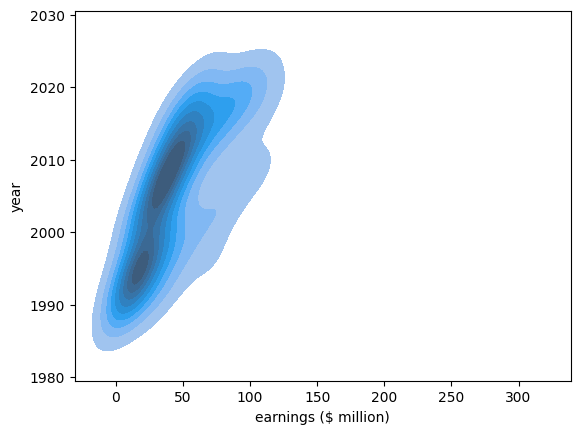

Country which produces maximum earners each year

C:\Users\Abid\AppData\Local\Temp\ipykernel_9584\2616075984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(counts_top, x='Nationality', y='count', palette='viridis')


<Axes: xlabel='Nationality', ylabel='count'>

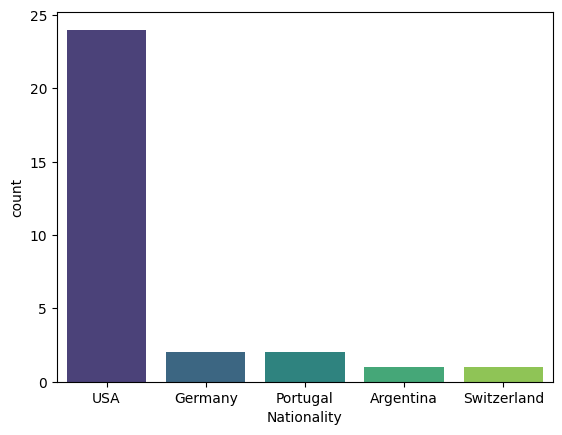

In [119]:
counts_top = top_paid_player_each_year['Nationality'].value_counts().to_frame()
sns.barplot(counts_top, x='Nationality', y='count', palette='viridis')

How much did top paid players made each year

<Axes: xlabel='year', ylabel='earnings ($ million)'>

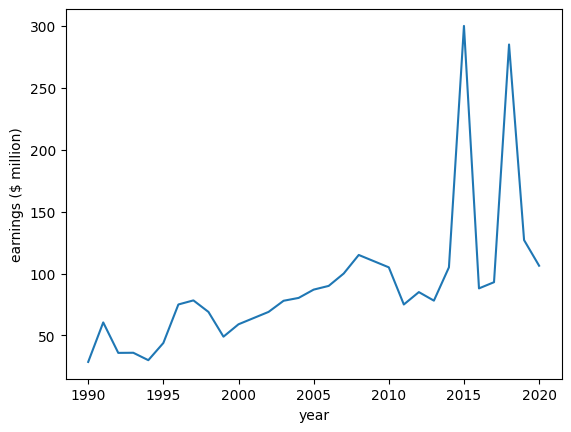

In [126]:
sns.lineplot(top_paid_player_each_year, x=top_paid_player_each_year.index, y='earnings ($ million)')

Sport which dominates in earnings

C:\Users\Abid\AppData\Local\Temp\ipykernel_9584\2299545906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(max_sport, x='count', y=max_sport.index, palette='viridis')


<Axes: xlabel='count', ylabel='Sport'>

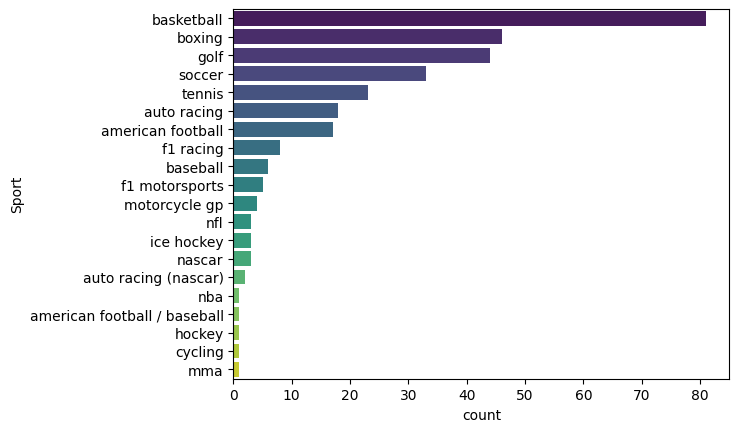

In [151]:
max_sport = df['Sport'].value_counts().to_frame()
max_sport
sns.barplot(max_sport, x='count', y=max_sport.index, palette='viridis')

Country which dominates in sport earnings

C:\Users\Abid\AppData\Local\Temp\ipykernel_9584\17855765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(max_sport, x='count', y=max_sport.index, palette='viridis')


<Axes: xlabel='count', ylabel='Nationality'>

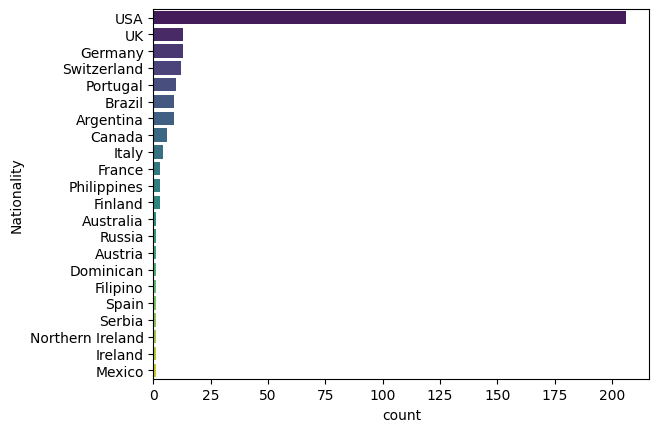

In [155]:
max_sport = df['Nationality'].value_counts().to_frame()
sns.barplot(max_sport, x='count', y=max_sport.index, palette='viridis')

Top 5 athletes appearing most times in the list

In [157]:
max_appearing_athletes = df['Name'].value_counts().to_frame()[:5]
max_appearing_athletes.style.background_gradient(cmap='Pastel1')

,count
Name,
Michael Jordan,19
Tiger Woods,19
Kobe Bryant,14
Michael Schumacher,13
LeBron James,13


Analysis of top 3 players of all time 

In [162]:
top_earners_alltime = pd.pivot_table(df, index=df['Name'], values='earnings ($ million)', aggfunc='sum')
top3_earners_alltime = top_earners_alltime.sort_values(by='earnings ($ million)', ascending=False)[:3]
top3_earners_alltime.style.background_gradient(cmap='Reds')

,earnings ($ million)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000


In [179]:
def earnings_plot(df, athlete):
    athlete_df = pd.DataFrame(df[df['Name'] == athlete])
    sns.lineplot(athlete_df, x=athlete_df.index, y='earnings ($ million)')

1. Tiger Woods

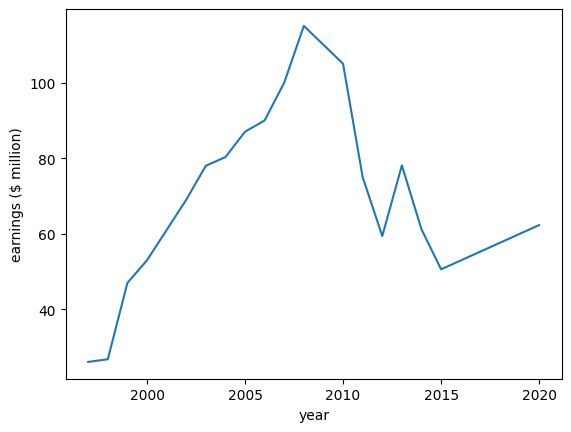

In [ ]:
earnings_plot(df, 'Tiger Woods')

2. LeBron James

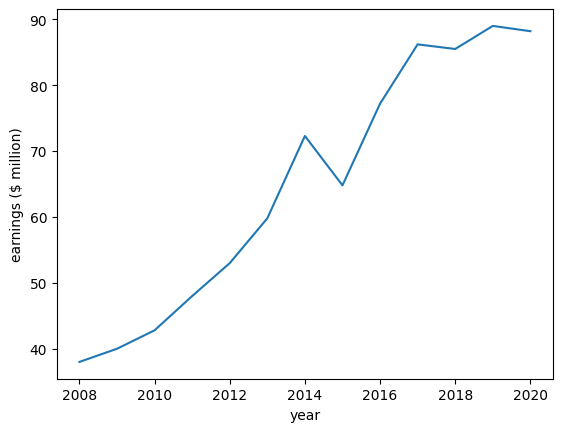

In [181]:
earnings_plot(df, 'LeBron James')

3. Floyd Mayweather

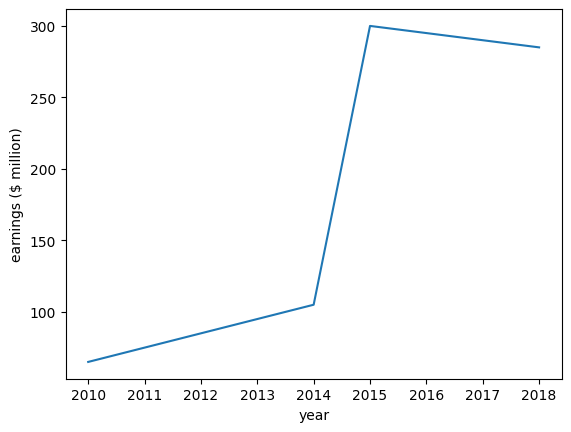

In [182]:
earnings_plot(df, 'Floyd Mayweather')